## Índices Mundiais

In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

tickers = {'IBOV': '^BVSP', 'SP500': '^GSPC', 'Nasdaq': '^IXIC',
           'DAX': '^GDAXI', 'DowJones': '^DJI', 'India': '^BSESN',
           'Japao':'^N225'}

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

## Gerando um CSV a partir dos tickers acima

In [2]:
for k, v in tickers.items():
    df = web.DataReader(v, ds_yahoo, start, end)
    df.to_csv('csv/{}.csv'.format(k))

## Lendo os CSVs

In [3]:
ibov_df = pd.read_csv('csv/IBOV.csv', index_col=0)
sp500_df = pd.read_csv('csv/SP500.csv', index_col=0)
nasdaq_df = pd.read_csv('csv/Nasdaq.csv', index_col=0)
dax_df = pd.read_csv('csv/DAX.csv', index_col=0)
dji_df = pd.read_csv('csv/DowJones.csv', index_col=0)
india_df = pd.read_csv('csv/India.csv', index_col=0)
japao_df = pd.read_csv('csv/Japao.csv', index_col=0)

In [31]:
ibov_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02,246.000000
mean,89007.639990,87368.467099,88134.684705,88253.697599,4.205072e+06,88253.697599
std,8378.352168,8358.771553,8417.128511,8377.475164,1.402255e+06,8377.475164
min,71323.000000,69779.000000,70609.000000,70609.000000,0.000000e+00,70609.000000
25%,80318.500000,78979.250000,79499.250000,79694.250000,3.566625e+06,79694.250000
50%,89948.000000,88206.500000,89039.000000,89377.500000,4.185550e+06,89377.500000
75%,96552.000000,94764.000000,95631.500000,95791.250000,4.916125e+06,95791.250000
max,102617.000000,101589.000000,102061.437500,102062.000000,9.999000e+06,102062.000000


## Gerando um CSV com a coluna de Fechamento Ajustado de todos os índices

In [23]:
data = pd.DataFrame()

for k, v in tickers.items():
    data[k] = web.DataReader(v, ds_yahoo, start, end)['Adj Close']

data.to_csv('csv/indices_adj_close.csv')

In [24]:
all_index_adj_close_df = pd.read_csv('csv/indices_adj_close.csv', index_col=0)

## Gráfico do rendimento dos índices normalizados

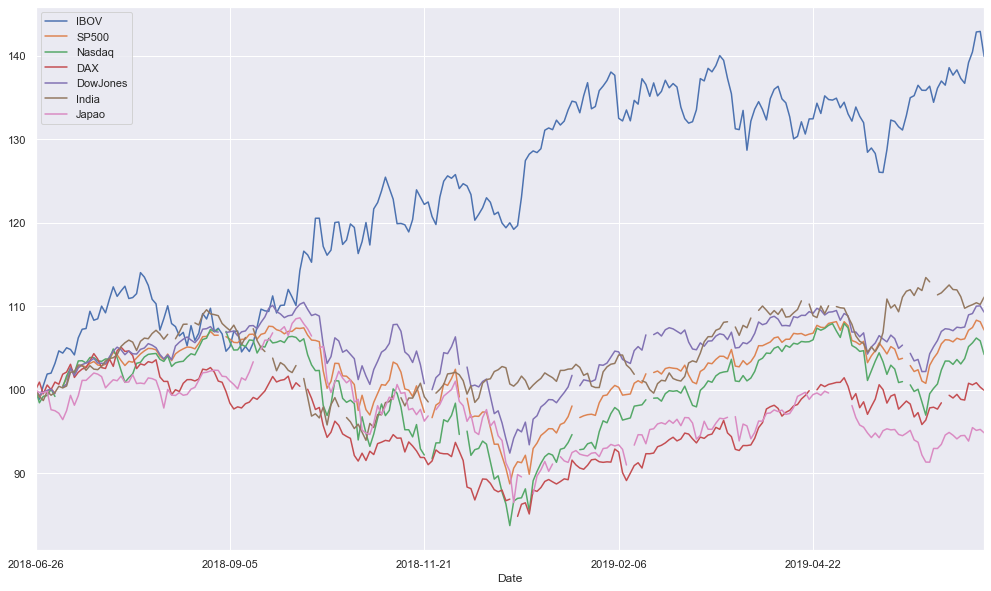

In [26]:
df_normalizado = all_index_adj_close_df / all_index_adj_close_df.iloc[0] * 100
df_normalizado.plot(figsize=(17,10));
#df_normalizado.head()

## Apenas índices estrangeiros

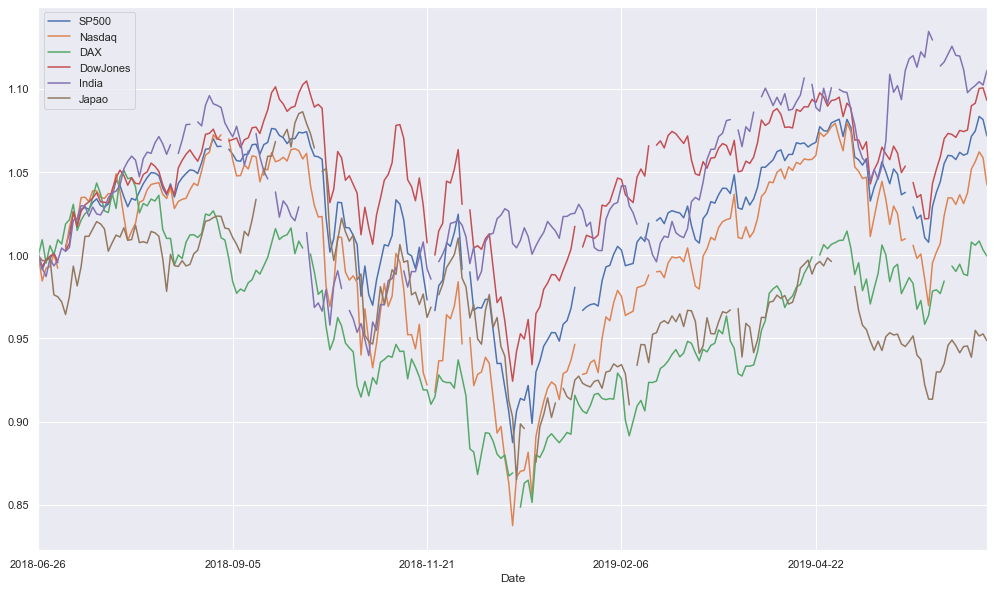

In [32]:
todos_indices_sem_ibov = all_index_adj_close_df.drop(labels='IBOV', axis=1, inplace=False)

(todos_indices_sem_ibov / todos_indices_sem_ibov.iloc[0]).plot(figsize=(17,10));

## Média anual de retorno dos índices

In [33]:
index_returns = (all_index_adj_close_df / all_index_adj_close_df.shift(1)) - 1
annual_ind_returns = index_returns.mean() * 246 # média de pregões no ano
round(annual_ind_returns * 100, 3)

IBOV        36.193
SP500       10.877
Nasdaq       7.766
DAX          2.839
DowJones    13.291
India       18.054
Japao       -5.414
dtype: float64

## Média anual de retorno apenas do IBOV

In [9]:
ibov_adj_close = all_index_adj_close_df.get('IBOV')
ibov_return = (ibov_adj_close / ibov_adj_close.shift(1)) - 1
annual_ibov_return = ibov_return.mean() * 246
round(annual_ibov_return * 100, 3)

36.873

## Correlação entre índices

In [10]:
import numpy as np
import seaborn as sns

In [11]:
log_returns = np.log(all_index_adj_close_df / all_index_adj_close_df.shift(1))
corr_index = log_returns.corr()

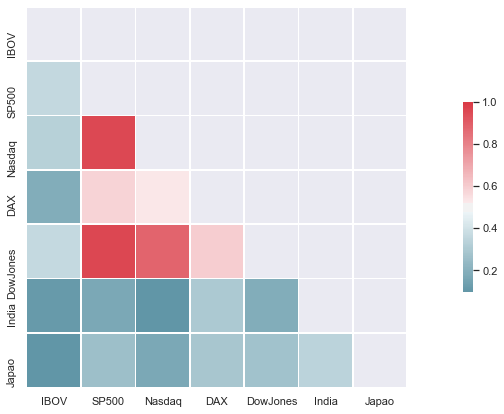

In [12]:
sns.set()

f, ax = plt.subplots(figsize=(20, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr_index, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_index, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [13]:
corr_index

,IBOV,SP500,Nasdaq,DAX,DowJones,India,Japao
IBOV,1.000000,0.363596,0.329278,0.183409,0.366309,0.115884,0.094979
SP500,0.363596,1.000000,0.956393,0.583122,0.964600,0.166574,0.257984
Nasdaq,0.329278,0.956393,1.000000,0.528108,0.880797,0.097448,0.166568
DAX,0.183409,0.583122,0.528108,1.000000,0.599930,0.299869,0.287618
DowJones,0.366309,0.964600,0.880797,0.599930,1.000000,0.188546,0.272823
India,0.115884,0.166574,0.097448,0.299869,0.188546,1.000000,0.340942
Japao,0.094979,0.257984,0.166568,0.287618,0.272823,0.340942,1.000000
